# Fundamentals of Data Analysis

## Anscombe Quartet 

### Compiled by: Marco Men
#### Date of Last Commit : 11th November 2018


## Introduction

Frank Anscombe was an English statistician,that became interested in statistical computing. He created the 'Anscombe Quartet' dataset(a compilation of four mini datasets) to ilustrate the importance of graphs in statistical analysis.



In [3]:
# web scrape from wikipedia portrait and factual information
# from : 'https://en/wikipedia.or/wiki/Frank_Anscombe'

from selenium import webdriver

from IPython.core.display import display,HTML

driver = webdriver.Chrome()

driver.get('https://en.wikipedia.org/wiki/Frank_Anscombe')

ansc_table = driver.find_element_by_xpath('//table')

ansc_table_html = ansc_table.get_attribute('outerHTML')

display(HTML(ansc_table_html))





















WebDriverException: Message: 'chromedriver' executable needs to be in PATH. Please see https://sites.google.com/a/chromium.org/chromedriver/home


In [1]:
# anscombe DS can be found in seaborn library

import seaborn as sns

quartet = sns.load_dataset('anscombe')

print(quartet)


   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

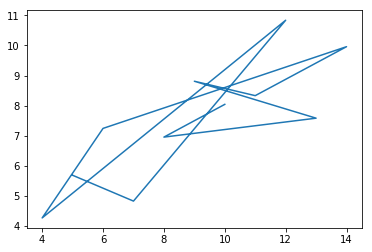

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

# subset per DS 
# can also be done with group_by function
# the default behaviour of matplotlib is to draw lines

ds_1 = quartet[quartet['dataset'] == 'I']

plt.plot(ds_1 ['x'], ds_1['y'])

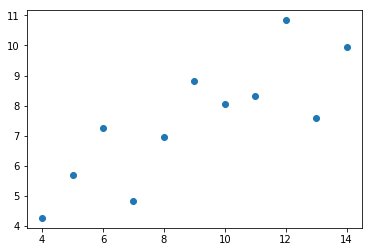

In [10]:
# to draw points as 'o'

plt.plot(ds_1['x'], ds_1['y'], 'o')

In [11]:
# creating subsets of anscombe data

ds_2 = quartet[quartet['dataset'] == 'II']

ds_3 = quartet[quartet['dataset'] == 'III']

ds_4 = quartet[quartet['dataset'] == 'IV']

In [7]:
print(ds_4)

   dataset     x      y
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0  12.50
41      IV   8.0   5.56
42      IV   8.0   7.91
43      IV   8.0   6.89


In [8]:
ds_1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
x,11.0,9.000000,3.316625,4.00,6.500,9.00,11.50,14.00
y,11.0,7.500909,2.031568,4.26,6.315,7.58,8.57,10.84


In [9]:
ds_2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
x,11.0,9.000000,3.316625,4.0,6.500,9.00,11.50,14.00
y,11.0,7.500909,2.031657,3.1,6.695,8.14,8.95,9.26


In [10]:
ds_3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
x,11.0,9.0,3.316625,4.00,6.50,9.00,11.50,14.00
y,11.0,7.5,2.030424,5.39,6.25,7.11,7.98,12.74


In [11]:
ds_4.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
x,11.0,9.000000,3.316625,8.00,8.00,8.00,8.00,19.0
y,11.0,7.500909,2.030579,5.25,6.17,7.04,8.19,12.5


In [12]:
# Performing a simple linear regression

# Adapted from: ''
import statsmodels.formula.api as smf

model1 = smf.ols(formula= 'y ~ x', data=ds_1)

model2 = smf.ols(formula= 'y ~ x', data=ds_2)

model3 = smf.ols(formula= 'y ~ x', data=ds_3)

model4 = smf.ols(formula= 'y ~ x', data=ds_4)

In [13]:
# Now the data can be fitted to each model

result1 =model1.fit()

result2 =model2.fit()

result3 =model3.fit()

result4 = model4.fit()

In [14]:
# print the summary of  the models for each DS
# Also the confidence interval
result1.summary()

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Fri, 19 Oct 2018   Prob (F-statistic):            0.00217
Time:                        22:28:33   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0001      1.125      2.667      0.026       0.456       5.544
x              0.5001      0.118      4.241      0.002       0.233       0.767
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   3.212
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.289
Skew:                          -0.122   Prob(JB):                        0.865
Kurtosis:                       2.244   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Do we remember the linear equation: y=mx+b. From the models displayed,this is represented by(coef of x)*x + coef of intercept
y = (0.5001)x + 3.0001.
Since all the models present the same values,they result on the same equation. So all 4 datasets should be represented linear

In [15]:
result2.summary()

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Fri, 19 Oct 2018   Prob (F-statistic):            0.00218
Time:                        22:28:36   Log-Likelihood:                -16.846
No. Observations:                  11   AIC:                             37.69
Df Residuals:                       9   BIC:                             38.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0009      1.125      2.667      0.026       0.455       5.547
x              0.5000      0.118      4.239      0.002       0.233       0.767
==============================================================================
Omnibus:                        1.594   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                1.108
Skew:                          -0.567   Prob(JB):                        0.575
Kurtosis:                       1.936   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The equation for the model above will be: y = (0.5000)x + 3.0009 (linear positive)

In [16]:
result3.summary()

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Fri, 19 Oct 2018   Prob (F-statistic):            0.00218
Time:                        22:28:39   Log-Likelihood:                -16.838
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0025      1.124      2.670      0.026       0.459       5.546
x              0.4997      0.118      4.239      0.002       0.233       0.766
==============================================================================
Omnibus:                       19.540   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.478
Skew:                           2.041   Prob(JB):                      0.00118
Kurtosis:                       6.571   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y= (0.4997)x + 3.0025 model above

In [17]:
result4.summary()

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     18.00
Date:                Fri, 19 Oct 2018   Prob (F-statistic):            0.00216
Time:                        22:28:43   Log-Likelihood:                -16.833
No. Observations:                  11   AIC:                             37.67
Df Residuals:                       9   BIC:                             38.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0017      1.124      2.671      0.026       0.459       5.544
x              0.4999      0.118      4.243      0.002       0.233       0.766
==============================================================================
Omnibus:                        0.555   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.758   Jarque-Bera (JB):                0.524
Skew:                           0.010   Prob(JB):                        0.769
Kurtosis:                       1.931   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For the model above the equation is represented by : y = (0.4999)x + 3.0017

## Conclusion


Do we remember the linear equation: y=mx+b. From the models displayed, all are represented by linear equations(positive correlation) with similar patterns. Since all the models present the same values,they result on the same equation. So all 4 datasets should be represented linear(positive). Direct correlation as oppose to inverse(which would be negative.
We can conclude from our analysis that there is a correlation between the four data sets, as they present similar results in there descriptive statistics and the show quite approximated values on their linear regression models.But wait, aren't the values(from the sub datasets) used to create descriptive statistics the same ones used in calculating the linear regression models? Yes, they are. So naturally they will yield similar results. And,didn't Frank Anscombe warned statiticians of his time on the dangers of over reliance on analysis of numerical data? I believe he did. So,why am I falling for this trap. I should follow his advice and start plotting

Let's get plotting,to reinforce the numerical results and prove that I am right("That the numbers do not lie!")

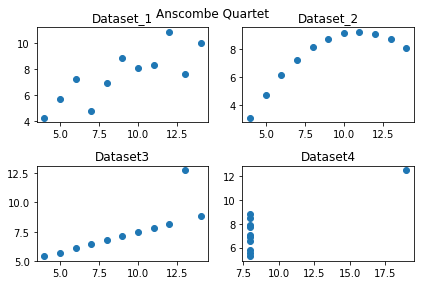

In [21]:
import matplotlib.pyplot as plt

# create the fig where the subplots will be represented
fig = plt.figure()


# how subplots will be laid out(2 rows x 2 plots each row)

# subplot has 2 rows and 2 columns,plot location 1
axes1 = fig.add_subplot(2,2,1)

# subplot has 2 rows and 2 columns,plot location 2
axes2 = fig.add_subplot(2,2,2)

# subplot has 2 rows and 2 columns.plot location 3
axes3 = fig.add_subplot(2,2,3)

# subplot has 2 rows 2 columns,plot location 4
axes4 = fig.add_subplot(2,2,4)

# add a plot to each of the axes created above

axes1.plot(ds_1['x'],ds_1['y'],'o')
axes2.plot(ds_2['x'],ds_2['y'],'o')
axes3.plot(ds_3['x'],ds_3['y'],'o')
axes4.plot(ds_4['x'],ds_4['y'],'o')

# add a small title to each subplot

axes1.set_title('Dataset_1')
axes2.set_title('Dataset_2')
axes3.set_title('Dataset3')
axes4.set_title('Dataset4')

# add title to the entire figure

fig.suptitle('Anscombe Quartet')

# use a tight_layout

fig.tight_layout()


Uh!!Oh,Oh! This does not make sense!

## Interpretation of Data Visualisation

### Dataset_1

This graph shows a linear representation of the dataset1('I'). By the equation mentioned above(y=mx + b)

### Dataset_2

This graph appears to represent a quadratic function,as it behaves like an hyperbole(y=x** 2)

### Dataset_3

Could be a linear representation,if not for the **outlier**(note below)


### Dataset_4

Again,if not for the *outlier*, this dataset would have been a representation of m and x=constant(y=mx + b).



### Outliers

Because of the outliers,datasets 3 and 4 show misleading results. The interpretation of the numerical data(solely) may lead the analyst towards wrong conclusions. But what are outliers and what should we do about them?
The definition,an outlier is an observation that lies outside the overall pattern of the distribution(Moore and McCabe 1999). Usually,the presence of an outlier indicates some sort of problem. This can be a case which does not fit the model under study, or an error in measurement.Outliers can also occur when comparing relationships between two sets of data. They are easily spotted through several data visualisation graphs(histograms,scatterplots,etc.)

When performing least squares fitting to data, it is often best to discard outliers before computing the line of best fit. This is particularly true of outliers along the x direction, since these points may greatly influence the result.
(http://mathworld.wolfram.com/Outlier.html)

But,what if the outlier is necessary for the dataset? What if,by removing an outlier another one will emerge?
We must first get an understanding of what the outlier represents, how it was created and how does it affect the dataset, before removing it.

Anscombe,conducted an analysis on US state public schools per-capita expenditure,in which he identified Alaska as having outlying pattern compared to other States' schools. Removing the data from the Alaska state will make the data shift and create another outlier. If he would have kept removing it,he would be left with no data to analyse. The solution was to analyse with Alaska and then without,to see if any major changes to the results have occured. It would have made no difference in that case(https://books.google.ie/books?id=FzXVBwAAQBAJ&pg=PA226&lpg=PA226&dq=anscombe+on+per+capita+expenditure+on+public+schools&source=bl&ots=GYBNa778cN&sig=xdUQI94fBCS3MOLOM_yOe2MxDx8&hl=en&sa=X&ved=2ahUKEwjj0obGso3eAhVMD8AKHagQA2EQ6AEwB3oECAEQAQ#v=onepage&q=anscombe%20on%20per%20capita%20expenditure%20on%20public%20schools&f=false). In this study, he concluded that there was inequalities amongst different States in public schools expenditures per capita.


In the quartet, we do not know what the outliers represent. But we do know that they affect the overall results.So we should further investigate them,once identified through plotted graphs.
First, I am going to plot some histograms with density plots to see the pattern of the data distribution on each subeset, and then I will run model diagnostics on our data using residuals and QQ plots to see how well our data(models) is fitted(the distance from the regression line.

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Frequency')

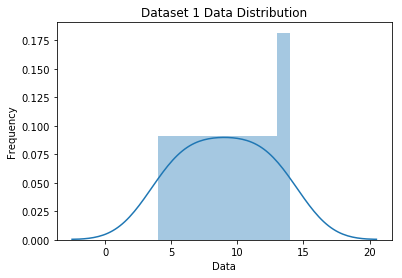

In [37]:
# Let's start with distributions
# Do we actually need the ?
import pandas as pd
import matplotlib as plt
import seaborn as sns
from scipy.stats import norm




# displot function from seaborn to create plots
# The plots are histograms with density plots for each DS

ax1 = sns.distplot(ds_1['x'], bins= 10, kde = True)
ax1.set_title('Dataset 1 Data Distribution')
ax1.set_xlabel('Data')
ax1.set_ylabel('Frequency')




C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Frequency')

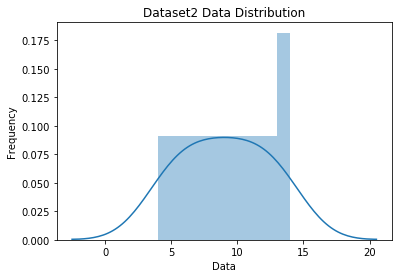

In [38]:
ax2 = sns.distplot(ds_2['x'], bins = 10,kde=True)
ax2.set_title('Dataset2 Data Distribution')
ax2.set_xlabel('Data')
ax2.set_ylabel('Frequency')

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Frequency')

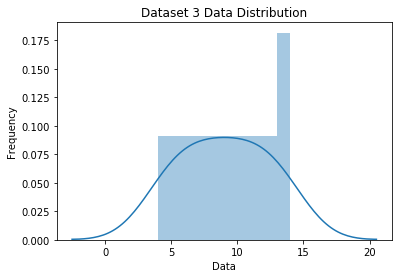

In [40]:
ax3 = sns.distplot(ds_3['x'], bins=10, kde=True)
ax3.set_title('Dataset 3 Data Distribution')
ax3.set_xlabel('Data')
ax3.set_ylabel('Frequency')

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Frequency')

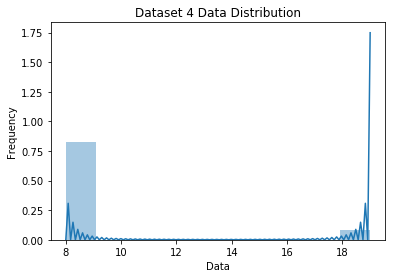

In [41]:
ax4 = sns.distplot(ds_4['x'], bins= 10, kde=True)
ax4.set_title('Dataset 4 Data Distribution')
ax4.set_xlabel('Data')
ax4.set_ylabel('Frequency')